# 0. Описание задачи


Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 


Описание датасета (переменные, которые содержит датасет):

1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

# 1. Первичный осмотр данных


In [446]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

study = pd.read_csv('stud_math.csv')

In [447]:
display(study.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [448]:
study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

*Всего в датасете 395 записей. Было загружено 30 колонок, на 29 из них есть описание в условиях задачи.*

# 2 Саммари по колонкам


Первичный осмотр датасета показал, что:
- Числовых колонок три: age, absences, score
- Бинарных колонок двенадцать: sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic
- Категорийных (несколько фиксированных значений) колонок тринадцать: Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health
- Остальные колонки пока тяжело отнести к какой-нибудь группе - таких две: school, studytime_granular

Всего 30 столбцов, столбец 'studytime, granular' - отсутствует в описании.

In [449]:
study.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [450]:
#Переименуем колонки для удобства работы
study.rename(columns={'Pstatus': 'p_status', 'Medu':'m_edu', 'Fedu':'f_edu',
       'Mjob':'m_job', 'Fjob':'f_job', 'studytime, granular': 'studytime_gr'}, inplace=True)

In [451]:
display(study.head(10))

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_gr,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


# Рассмотрим столбцы

## Столбец School

In [452]:
pd.DataFrame(study.school.value_counts())

,school
GP,349
MS,46


In [453]:
study.loc[:, ['school']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


*School - без пропусков значений. Всего значений 2, наиболее популярное GP.*

## Рассмотрим studytime_gr

In [454]:
study.loc[:,['studytime_gr', 'studytime', 'score', 'failures']]

,studytime_gr,studytime,score,failures
0,-6.0,2.0,30.0,0.0
1,-6.0,2.0,30.0,0.0
2,-6.0,2.0,50.0,3.0
3,-9.0,3.0,75.0,0.0
4,-6.0,2.0,50.0,0.0
...,...,...,...,...
390,-6.0,2.0,45.0,2.0
391,-3.0,1.0,80.0,0.0
392,-3.0,1.0,35.0,3.0
393,-3.0,1.0,50.0,0.0


Похоже, что studytime_gr получен умножением studytime на -3

In [455]:
display(pd.DataFrame(study.studytime.value_counts()),pd.DataFrame(study.studytime_gr.value_counts()))

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


,studytime_gr
-6.0,194
-3.0,103
-9.0,64
-12.0,27


In [456]:
study['studytime'].corr(study['studytime_gr']) #А тут совсем любопытно, я ожидал значение корреляции -1

-0.9999999999999991

In [457]:
# Удаляем столбец studytime_gr при такой высокой корреляции он скорее всего не пригодится для анализа
study.drop(['studytime_gr'], inplace = True, axis = 1)

## Колонка studytime

In [458]:
study.loc[:, ['studytime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [459]:
pd.DataFrame(study.studytime.value_counts())

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


In [460]:
(395-388)/395

0.017721518987341773

**studytime** *содержит типа 4 значения - категоральный признак. 7 значений отсутствуют (менее 1.8%). Заполнить пропуски на данный момент не представляется возможным.*

# Столбец Medu — образование матери 
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)


In [461]:
pd.DataFrame(study.m_edu.value_counts())

,m_edu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


In [462]:
study.loc[:, ['m_edu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m_edu   392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


**m_edu** *- категоральный признак, содержит одно из 5 значений. 3 значения отсутствуют. Заполнить пропуски на данный момент не представляется возможным.*

# Столбец Fedu — образование отца
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)


In [463]:
pd.DataFrame(study.f_edu.value_counts())

,f_edu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


In [464]:
study.loc[:, ['f_edu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_edu   371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


**f_edu** *- категоральный признак, содержит одно из 5 значений. 24 значения отсутствуют. Заполнить пропуски на данный момент не представляется возможным.*

Одно значение не из списка, похоже на опечатку, скорректируем его.

In [465]:
study.loc[study['f_edu'] == 40.0, 'f_edu'] = 4.0

In [466]:
pd.DataFrame(study.f_edu.value_counts()) #проверяем

,f_edu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


# Столбец Mjob — работа матери 
('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [467]:
pd.DataFrame(study.m_job.value_counts())

,m_job
other,133
services,98
at_home,58
teacher,55
health,32


In [468]:
study.loc[:, ['m_job']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_job   376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


**m_job** *- Значения соответствуют тому, что было в описании. 19 значений отсутствуют. Заполнить пропуски на данный момент не представляется возможным.*

# Столбец Fjob — работа отца 
('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [469]:
pd.DataFrame(study.f_job.value_counts())

,f_job
other,197
services,102
teacher,29
at_home,16
health,15


In [470]:
study.loc[:, ['f_job']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f_job   359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


**f_job** *- Значения соответствуют тому, что было в описании. 36 значений отсутствуют (около 9% от всех строк). Заполнить пропуски на данный момент не представляется возможным.*

## Столбец reason — причина выбора школы 
('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [471]:
pd.DataFrame(study.reason.value_counts())

,reason
course,137
home,104
reputation,103
other,34


In [472]:
study.loc[:, ['reason']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


**reason** *- четыре уникальных значения как в описании. 17 строк в которых значения неизвестны. Заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много, потому что выделить какое-то одно значение из четырех однозначно доминирующее невозможно.*

# Столбец guardian — опекун 
('mother' - мать, 'father' - отец, 'other' - другое)

In [473]:
pd.DataFrame(study.guardian.value_counts())

,guardian
mother,250
father,86
other,28


In [474]:
study.loc[:, ['guardian']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


**guardian** *- содержит три уникальных значения как в описании. 31 строка в которой значения неизвестны. Многовато пропусков, можно было бы заполнить значением mother при необходимости.*


## Столбец traveltime — время в пути до школы 
(1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [475]:
pd.DataFrame(study.traveltime.value_counts())

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


In [476]:
study.loc[:, ['traveltime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


**traveltime** *- четыре уникальных значения - как в описании. 28 строк в которых значения неизвестны. Заполнить пропуски на данный момент не представляется возможным.*

## Столбец failures — количество внеучебных неудач 
(n, если 1<=n<3, иначе 0)

In [477]:
pd.DataFrame(study.failures.value_counts())

,failures
0.0,293
1.0,49
2.0,16
3.0,15


In [478]:
study.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


**failures** *- значения соответствуют описанию. 22 строки в которых значения неизвестны. При необходимости можно было бы попробовать заполнить 0 - как доминирующим значением.*


## Столбец famrel — семейные отношения 
(от 1 - очень плохо до 5 - очень хорошо)

In [479]:
pd.DataFrame(study.famrel.value_counts())

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


-1 похоже на опечатку при заполнении - скореектируем

In [480]:
study.loc[study['famrel'] == -1.0, 'famrel'] = 1.0

In [481]:
pd.DataFrame(study.famrel.value_counts()) #проверим

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,8


In [482]:
study.loc[:, ['famrel']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


**famrel** *- пять уникальных значения как в описании. 27 строк в которых значения неизвестны. Заполнить пропуски на данный момент не представляется возможным.*

## Столбец freetime — свободное время после школы 
(от 1 - очень мало до 5 - очень мого)

In [483]:
pd.DataFrame(study.freetime.value_counts())

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


In [484]:
study.loc[:, ['freetime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


**freetime** *- пять уникальных значений, соответствует описанию. В 11 строках значения неизвестны. Заполнить пропуски на данный момент не представляется возможным.*

## Столбец goout — проведение времени с друзьями 
(от 1 - очень мало до 5 - очень много)

In [485]:
pd.DataFrame(study.goout.value_counts())

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


In [486]:
study.loc[:, ['goout']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


**goout** *-пять уникальных значений, соответствует описанию. В 8 строках значения неизвестны. Заполнить пропуски на данный момент не представляется возможным.*

## Столбец health — текущее состояние здоровья 
(от 1 - очень плохо до 5 - очень хорошо)

In [487]:
pd.DataFrame(study.health.value_counts())

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


In [488]:
study.loc[:, ['health']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


**health** *- пять уникальных значений, соответствует описанию. В 15 строках значения неизвестны. Заполнить пропуски на данный момент не представляется возможным. Так как вариантов для заполнения слишком много, потому что выделить какое-то одно значение из пяти однозначно доминирующее невозможно.*

## Колонка age — возраст ученика 
(от 15 до 22)

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

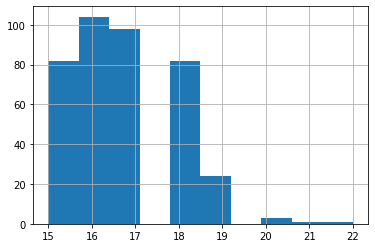

In [489]:
study.age.hist()
study.age.describe()

In [490]:
#На графике значения 17 и 19 отсутствуют?
study.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

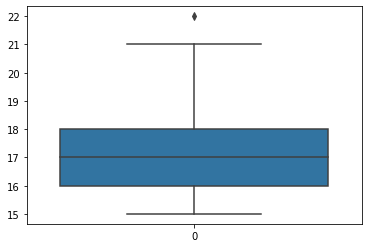

In [491]:
#Посмотрим, есть ли выбросы. В данном случае это сделано для тренировки т.к. все значения соответствуют описанию.
sns.boxplot(data=study.age)

**age** *- по значению пристутствуют выбросы, но они укладываются в описание задачи.*

## Столбец absences — количество пропущенных занятий

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

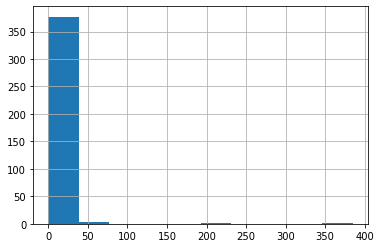

In [492]:
study.absences.hist()
study.absences.describe()

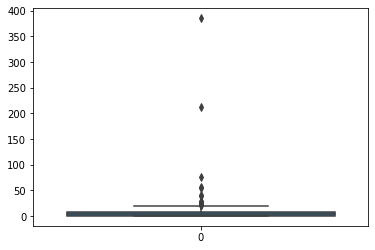

In [493]:
#проверим на наличие выбросов
sns.boxplot(data=study.absences)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


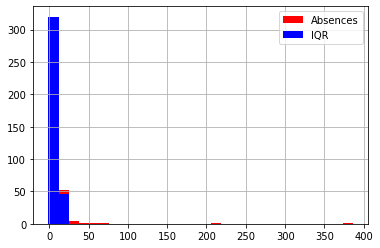

In [494]:
#проведем анализ границ
median = study.absences.median()
IQR = study.absences.quantile(0.75) - study.absences.quantile(0.25)
perc25 = study.absences.quantile(0.25)
perc75 = study.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


study.absences.loc[study.absences <= 385].hist(bins = 30, 
                                  range = (-1, 386), 
                                  color = 'red',
                                  label = 'Absences')

study.absences.loc[study.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 30, 
                                                                        range = (-1, 386),
                                                                        color = 'blue',
                                                                        label = 'IQR')

plt.legend();

In [495]:
study[study.absences > 100] #посмотрим на тех, кто пропускал много занятий

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


Запись с количеством пропусков 222 выглядит любопытно. Девушка из проблемной семьи, которая предпочитает не проводить время с друзьями. Возможно, наличие отца-учителя хорошо сказалось на итоговой оценке.

**absences** - *В условии задачи не говорилось за какой срок считались пропущенные занятия, но если это за год и в днях, то значение 385 - это дефект данных. У 12 записей отсутствуют значения. Присутствуют выбросы.*

## Столбец score — баллы по госэкзамену по математике


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

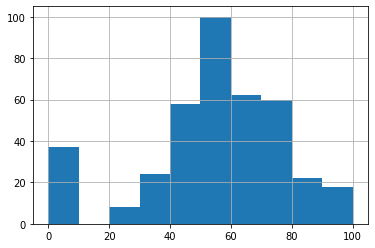

In [496]:
study.score.hist()
study.score.describe()

Значение 0 выглядит странно. Предположим, это оценка для случая, когда ученик не явился на экзамен.

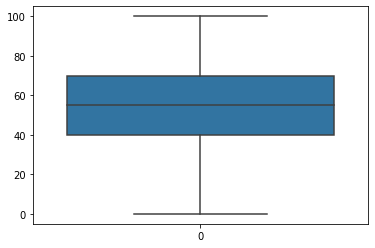

In [497]:
# посмотрим на выбросы, ожидаю, что будет выброс слева
sns.boxplot(data=study.score)

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


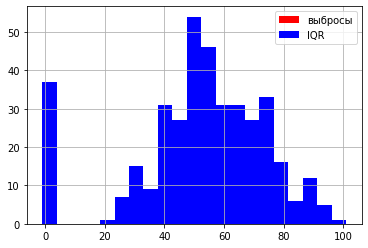

In [498]:
# проведем анализ границ
median = study.score.median()
IQR = study.score.quantile(0.75) - study.score.quantile(0.25)
perc25 = study.score.quantile(0.25)
perc75 = study.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


study.score.loc[study.score <= 101].hist(bins = 21, 
                                  range = (-1, 101), 
                                  color = 'red',
                                  label = 'выбросы')

study.score.loc[study.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 21, 
                                                                        range = (-1, 101),
                                                                        color = 'blue',
                                                                        label = 'IQR')

plt.legend();

## Столбец sex - пол ученика ('F' - женский, 'M' - мужской)

In [499]:
study.sex.describe()

count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

In [500]:
study.loc[:, ['sex']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


**sex** - *Пропусков значений нет.*

## Столбец address — тип адреса ученика ('U' - городской, 'R' - за городом)

In [501]:
study.address.describe()

count     378
unique      2
top         U
freq      295
Name: address, dtype: object

In [502]:
study.loc[:, ['address']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [503]:
pd.DataFrame(study.address.value_counts())

,address
U,295
R,83


**address** - *Большинство учеников из горада, у 17 записей значение признака отсутствует.*

## Столбец famsize — размер семьи('LE3' <= 3, 'GT3' >3)

In [504]:
study.famsize.describe()

count     368
unique      2
top       GT3
freq      261
Name: famsize, dtype: object

In [505]:
study.loc[:, ['famsize']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [506]:
pd.DataFrame(study.famsize.value_counts())

,famsize
GT3,261
LE3,107


**famsize** - *Большинство учеников из семей, где есть более трех человек. У 27 записей значение признака отсутствует.*

## Столбец Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [507]:
study.p_status.describe()

count     350
unique      2
top         T
freq      314
Name: p_status, dtype: object

In [508]:
study.loc[:, ['p_status']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   p_status  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [509]:
pd.DataFrame(study.p_status.value_counts())

,p_status
T,314
A,36


**p_status** - *Большинство учеников из полных семей. У 45 записей значение признака отсутствует.*

## Столбец schoolsup — дополнительная образовательная поддержка (yes или no)

In [510]:
study.schoolsup.describe()

count     386
unique      2
top        no
freq      335
Name: schoolsup, dtype: object

In [511]:
study.loc[:, ['schoolsup']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [512]:
pd.DataFrame(study.schoolsup.value_counts())

,schoolsup
no,335
yes,51


**schoolsup** - *Большинство учеников дополнительной образовательной поддержкой не пользуются. У 9 записей значение признака отсутствует.*

## Столбец famsup — семейная образовательная поддержка (yes или no)

In [513]:
study.famsup.describe()

count     356
unique      2
top       yes
freq      219
Name: famsup, dtype: object

In [514]:
study.loc[:, ['famsup']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [515]:
pd.DataFrame(study.famsup.value_counts())

,famsup
yes,219
no,137


**famsup** - *Большинство учеников семейной образовательной поддержкой пользуются. У 39 записей значение признака отсутствует.*

## Столбец paid — дополнительные платные занятия по математике (yes или no)

In [516]:
study.paid.describe()

count     355
unique      2
top        no
freq      200
Name: paid, dtype: object

In [517]:
study.loc[:, ['paid']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [518]:
pd.DataFrame(study.paid.value_counts())

,paid
no,200
yes,155


**paid** - *Учеников, которые не берут дополнительные платные занятия больше. У 40 записей значение признака отсутствует. Предполагаю, что незаполненные значения в большинстве своем будут эквивалентны no.*

## Столбец activities — дополнительные внеучебные занятия (yes или no)

In [519]:
study.activities.describe()

count     381
unique      2
top       yes
freq      195
Name: activities, dtype: object

In [520]:
study.loc[:, ['activities']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [521]:
pd.DataFrame(study.activities.value_counts())

,activities
yes,195
no,186


**activities** - *Учеников, которые берут дополнительные внеучебные занятия немного больше. У 14 записей значение признака отсутствует.*

## Столбец nursery — посещал детский сад (yes или no)

In [522]:
study.nursery.describe()

count     379
unique      2
top       yes
freq      300
Name: nursery, dtype: object

In [523]:
study.loc[:, ['nursery']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [524]:
pd.DataFrame(study.nursery.value_counts())

,nursery
yes,300
no,79


**nursery** - *подавляющее большинство учеников посещали детский сад. У 16 записей значение признака отсутствует.*

## Столбец higher — хочет получить высшее образование (yes или no)

In [525]:
study.higher.describe()

count     375
unique      2
top       yes
freq      356
Name: higher, dtype: object

In [526]:
study.loc[:, ['higher']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [527]:
pd.DataFrame(study.higher.value_counts())

,higher
yes,356
no,19


**higher** - *подавляющее большинство учеников хочет получить высшее образование. У 20 записей значение признака отсутствует.*

## Столбец internet — наличие интернета дома (yes или no)

In [528]:
study.internet.describe()

count     361
unique      2
top       yes
freq      305
Name: internet, dtype: object

In [529]:
study.loc[:, ['internet']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [530]:
pd.DataFrame(study.internet.value_counts())

,internet
yes,305
no,56


**internet** - *подавляющее большинство учеников имеет дома интернет. У 34 записей значение признака отсутствует.*

## Столбец romantic — в романтических отношениях (yes или no)

In [531]:
study.romantic.describe()

count     364
unique      2
top        no
freq      240
Name: romantic, dtype: object

In [532]:
study.loc[:, ['romantic']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [533]:
pd.DataFrame(study.romantic.value_counts())

,romantic
no,240
yes,124


**internet** - *большинство учеников не находятся в отношениях. У 31 записи значение признака отсутствует.*

# 3. Корреляционный анализ

Выясним, какие столбцы коррелируют с оценкой за экзамен. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Корреляции рассмотрим только для числовых столбцов.

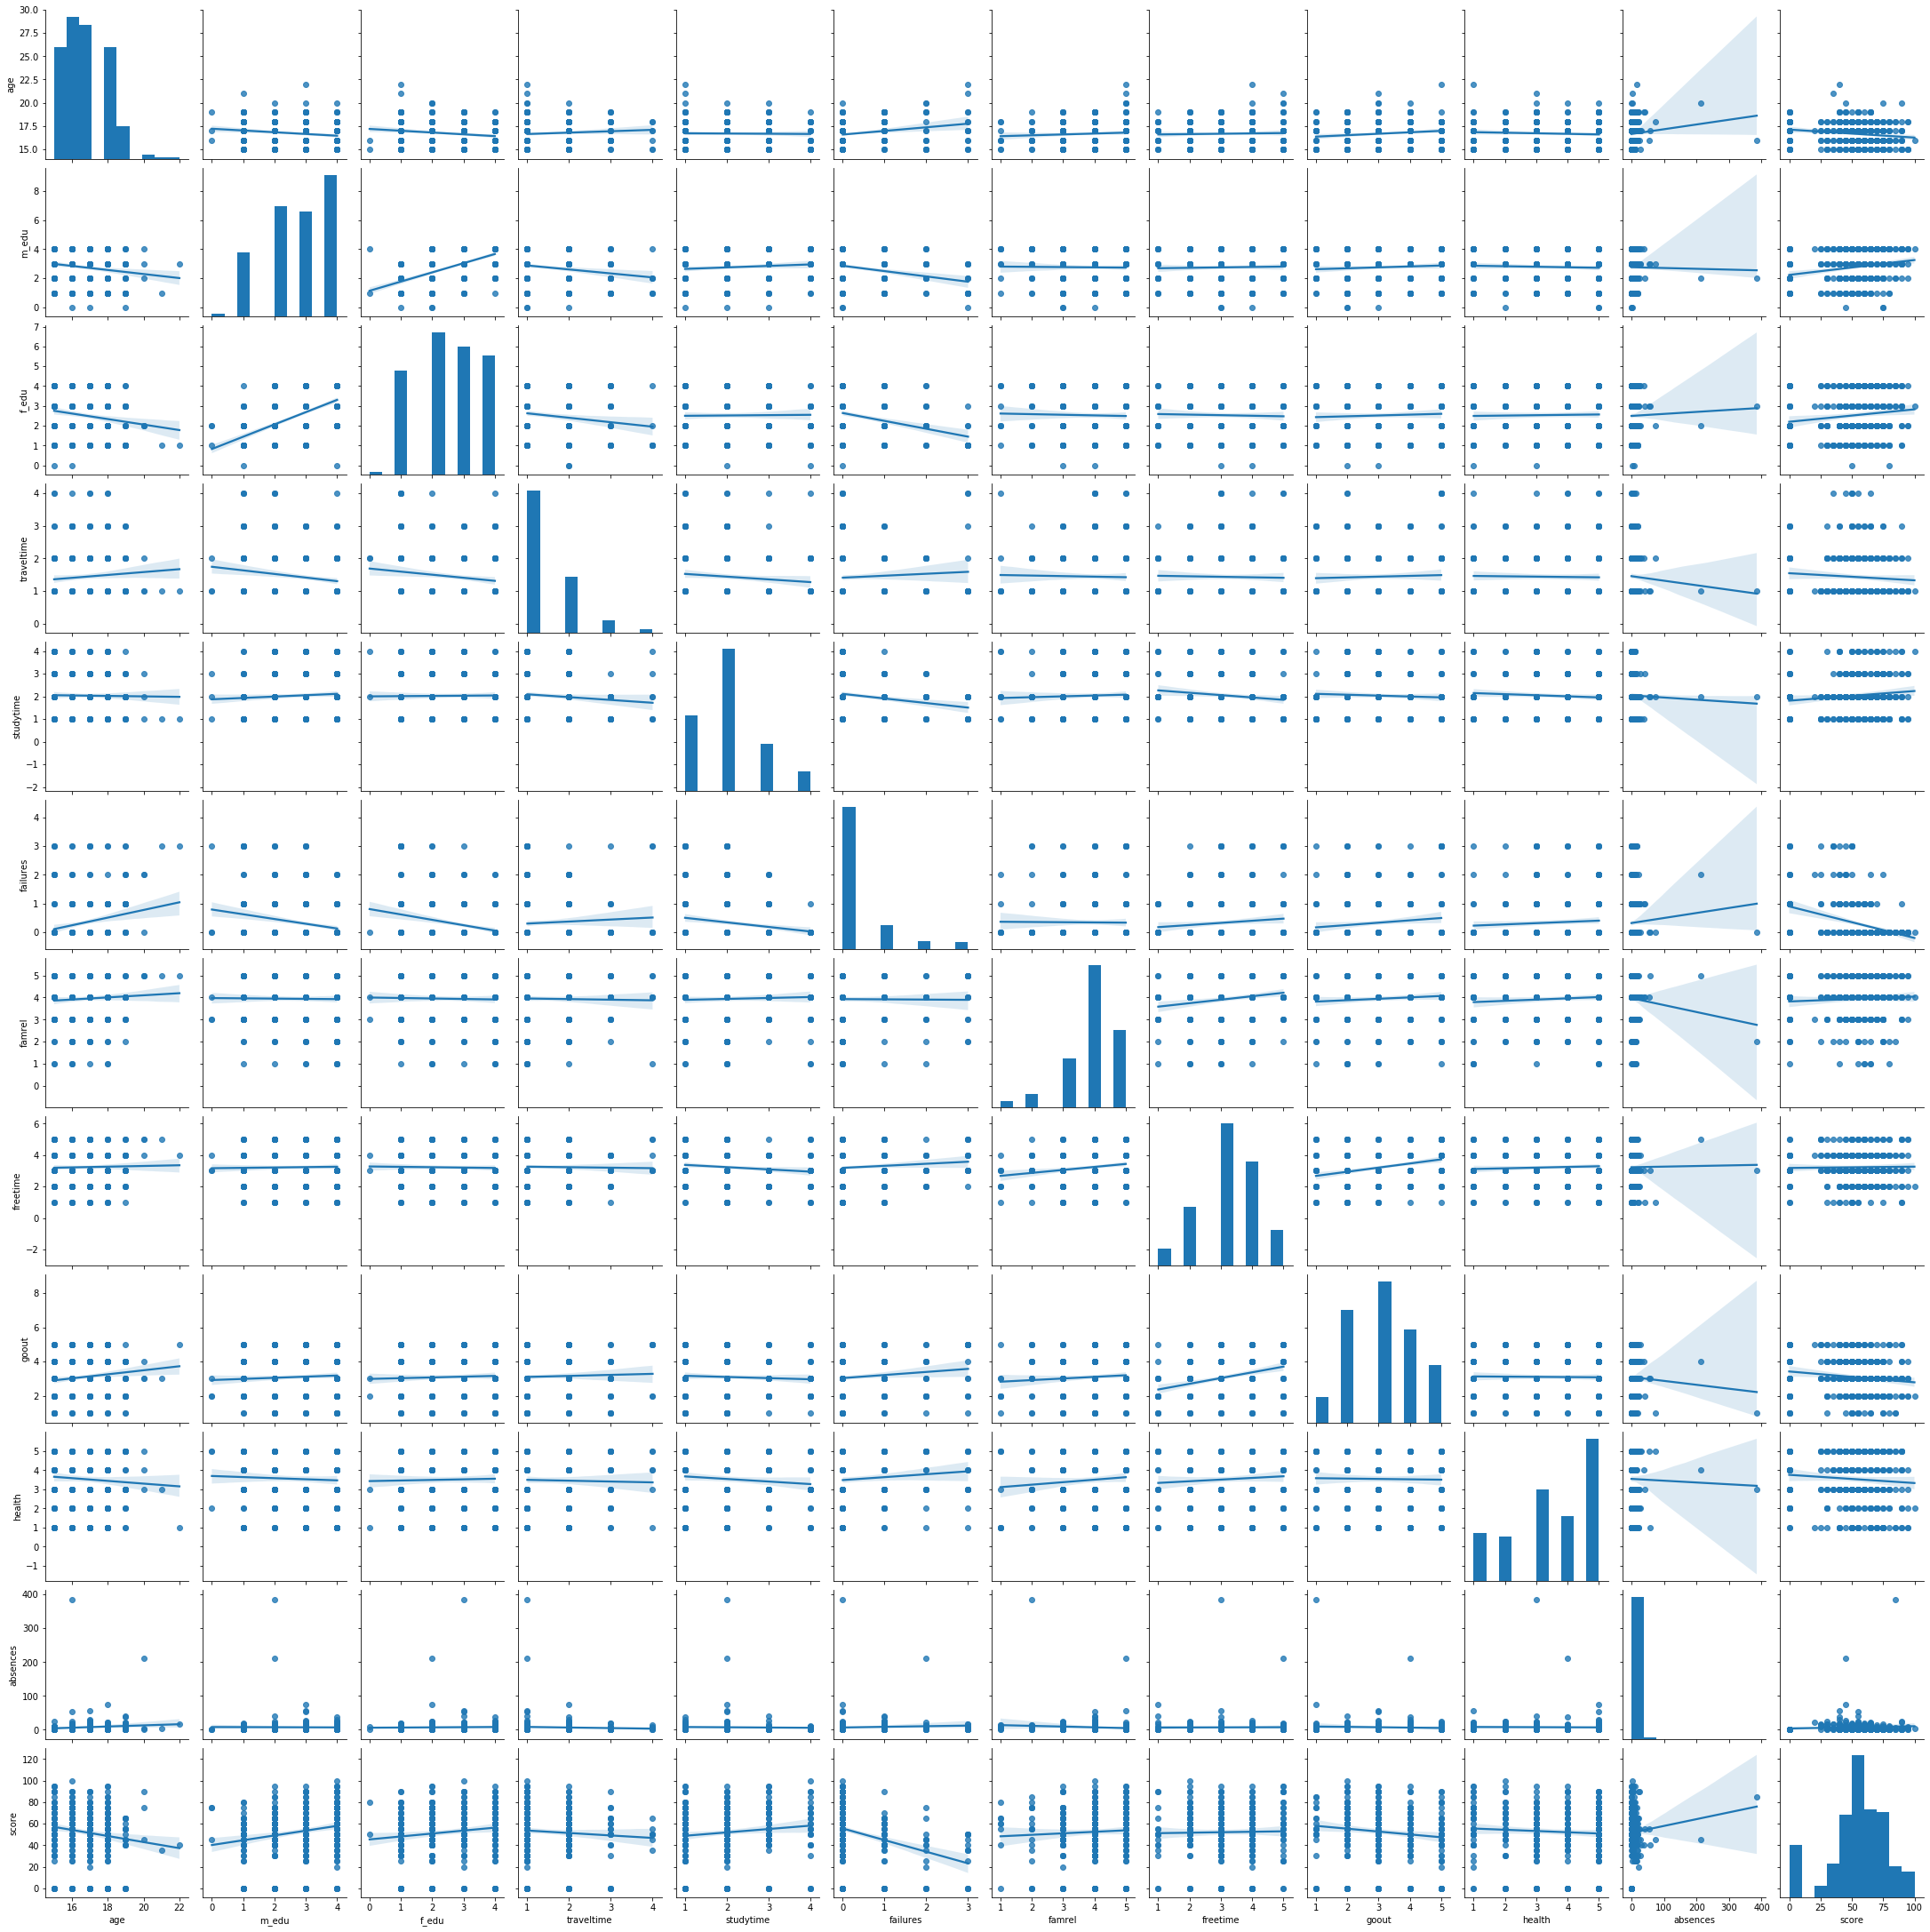

In [534]:
sns.pairplot(study, kind = 'reg')

In [535]:
study.corr()

,age,m_edu,f_edu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.163670,0.081508,-0.015556,0.228047,0.067415,0.029023,0.135107,-0.065946,0.093592,-0.155726
m_edu,-0.161704,1.000000,0.625516,-0.173515,0.078589,-0.245463,-0.014459,0.025335,0.064164,-0.045051,-0.011944,0.213349
f_edu,-0.163670,0.625516,1.000000,-0.145349,0.012896,-0.272882,-0.026122,-0.025892,0.042663,0.023862,0.022572,0.130923
traveltime,0.081508,-0.173515,-0.145349,1.000000,-0.102206,0.064699,-0.021542,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.012896,-0.102206,1.000000,-0.178992,0.039555,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.272882,0.064699,-0.178992,1.000000,-0.009110,0.098382,0.120914,0.081284,0.057391,-0.344338
famrel,0.067415,-0.014459,-0.026122,-0.021542,0.039555,-0.009110,1.000000,0.172751,0.077167,0.086309,-0.083064,0.055305
freetime,0.029023,0.025335,-0.025892,-0.021937,-0.121969,0.098382,0.172751,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,0.042663,0.037636,-0.051280,0.120914,0.077167,0.296437,1.000000,-0.015608,-0.048738,-0.129685
health,-0.065946,-0.045051,0.023862,-0.021531,-0.080016,0.081284,0.086309,0.061575,-0.015608,1.000000,-0.016222,-0.070460


In [536]:
#TODO: add text

## Анализ категориальных переменных

In [537]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=study.loc[study.loc[:, column].isin(study.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

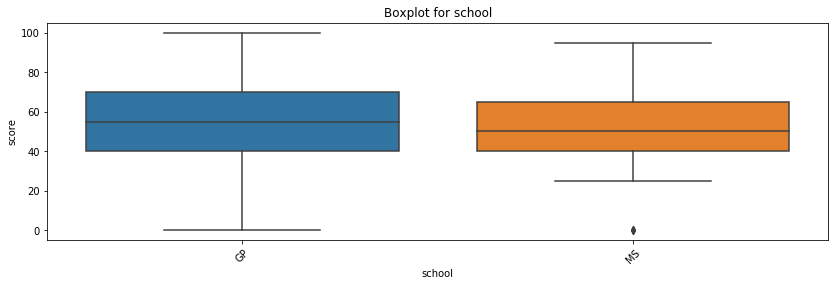

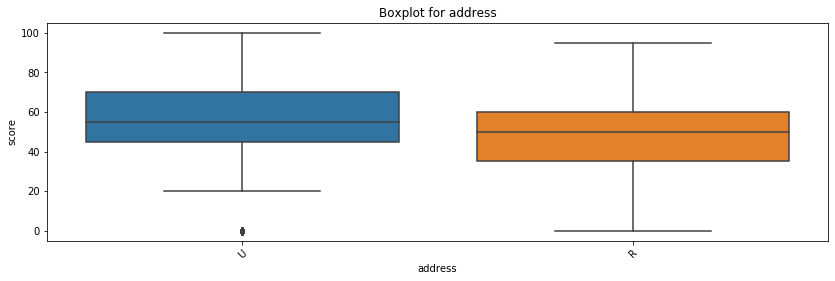

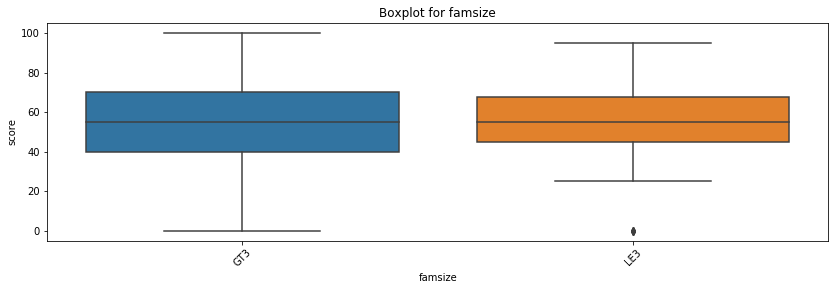

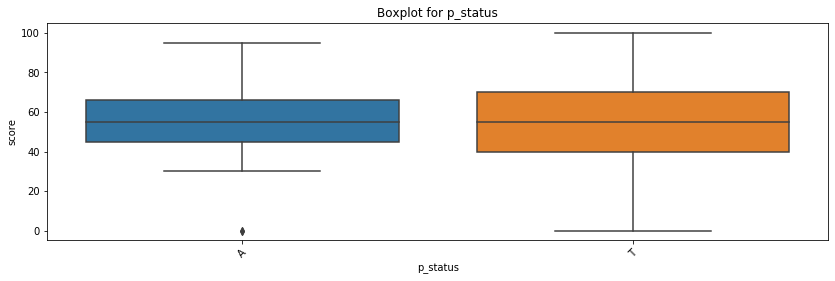

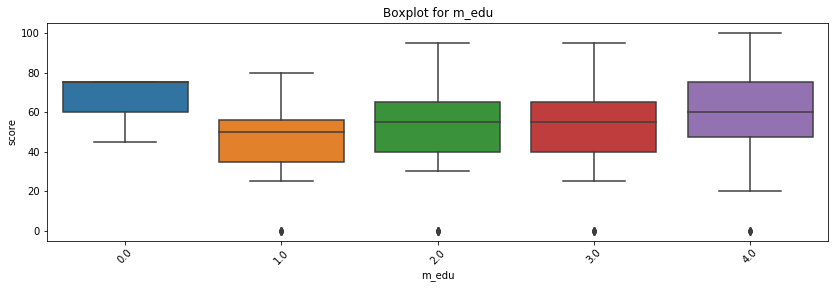

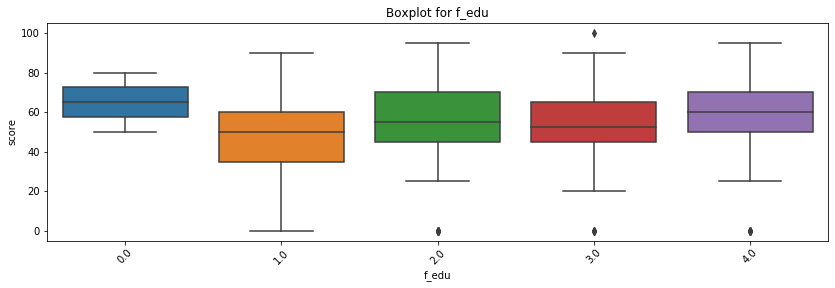

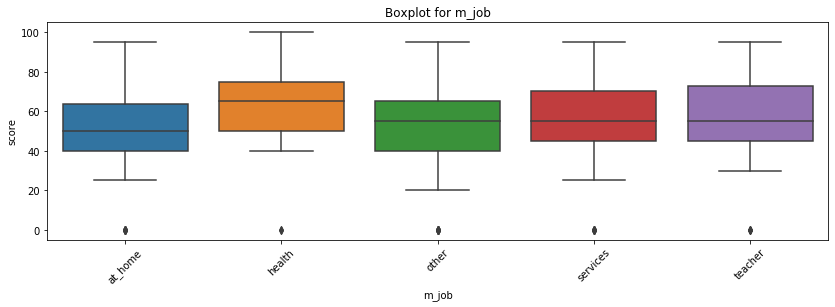

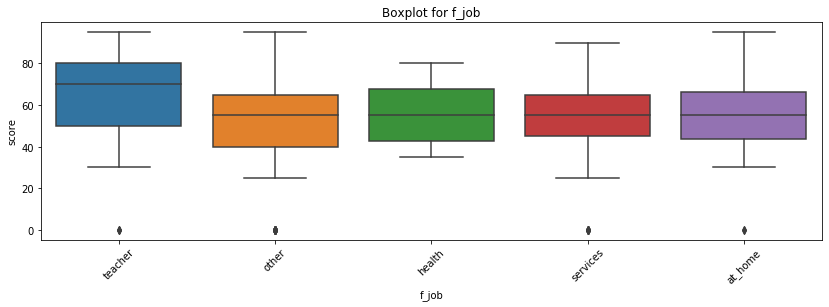

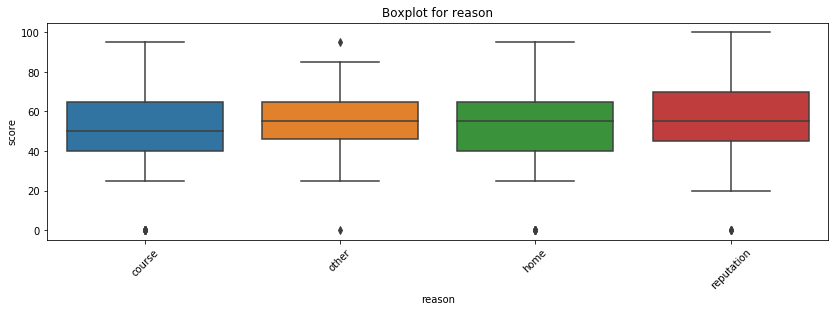

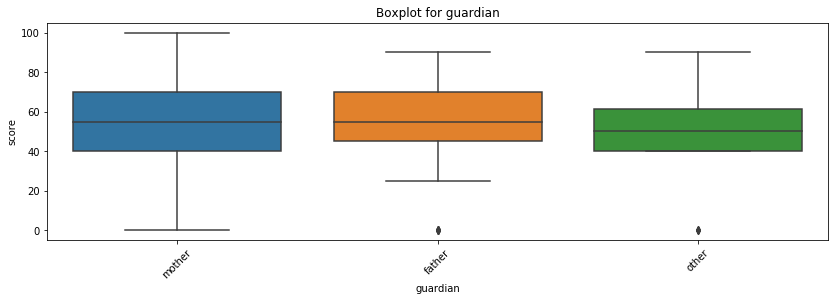

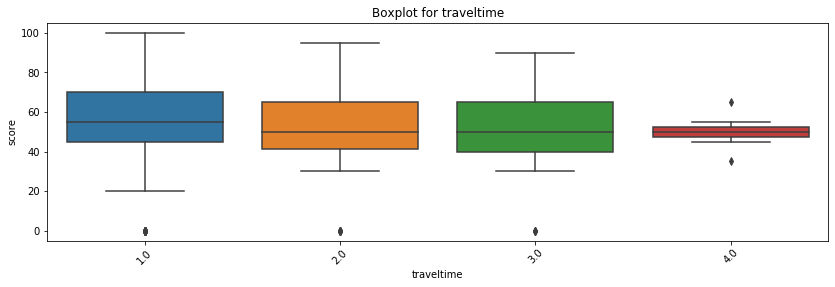

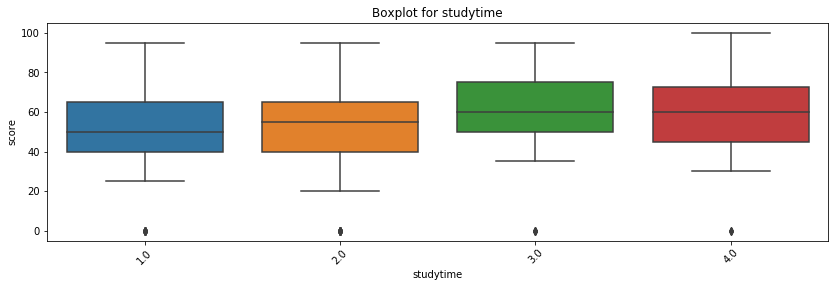

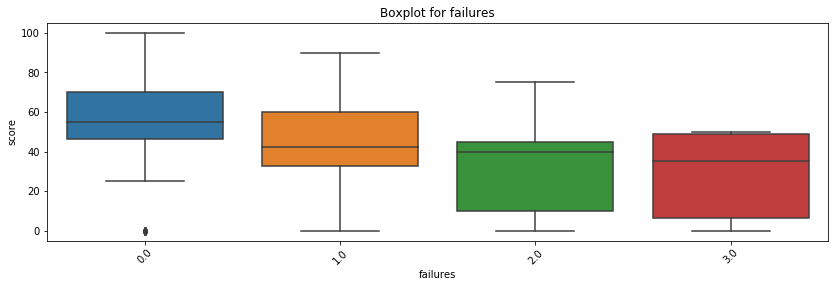

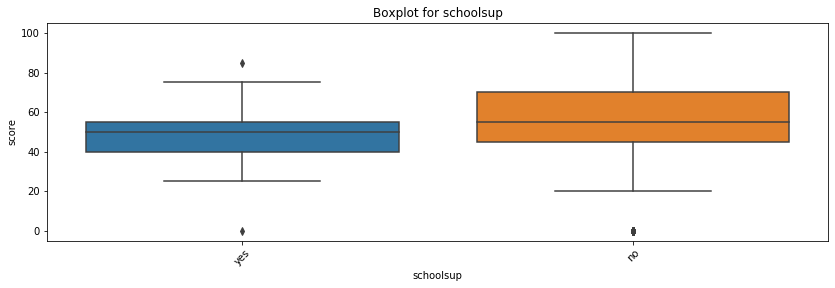

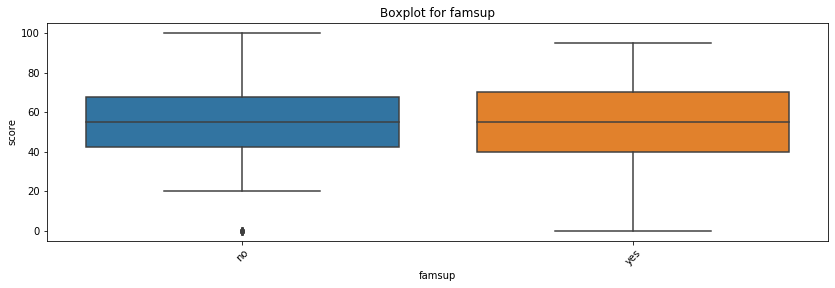

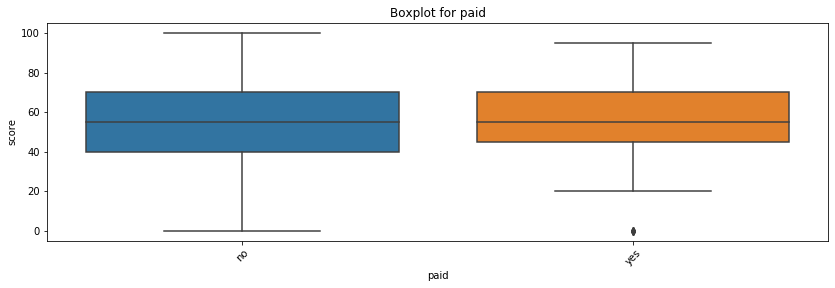

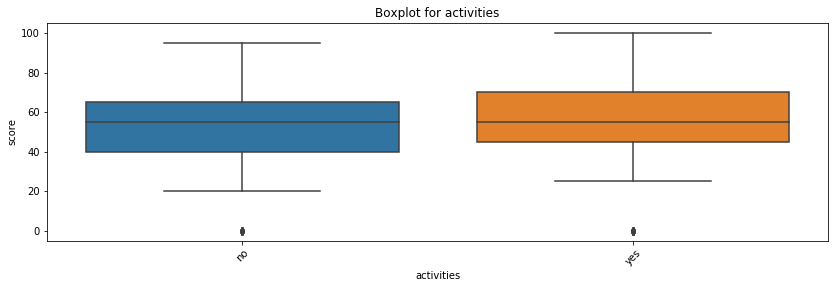

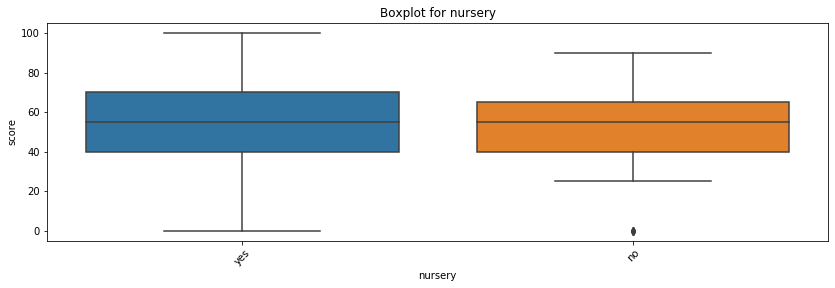

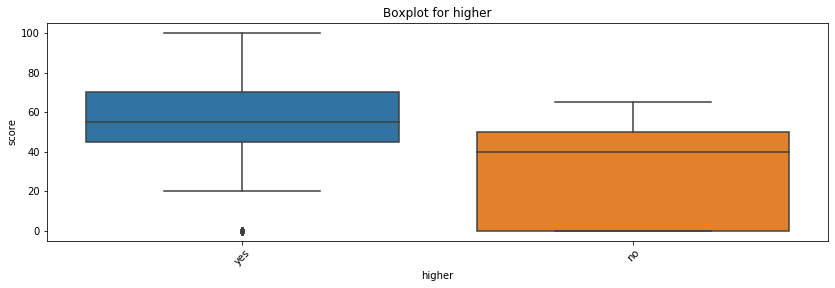

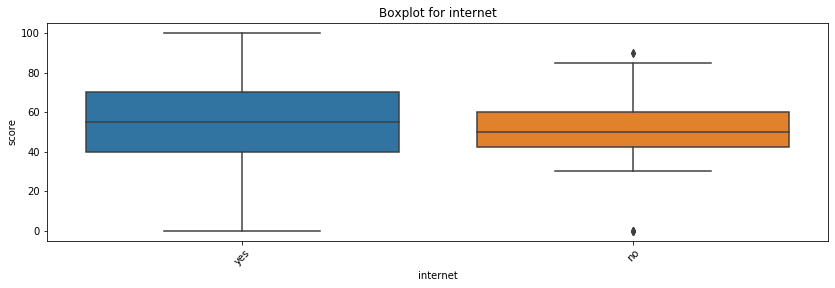

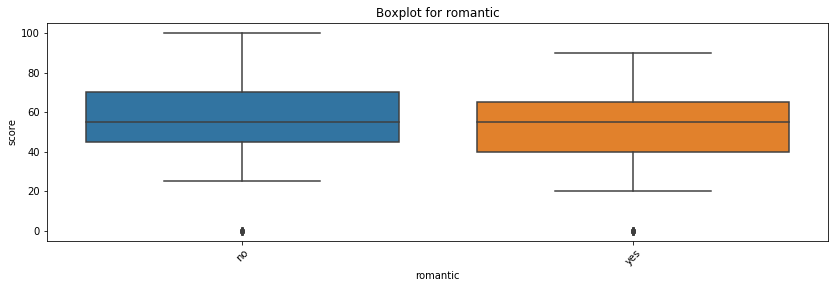

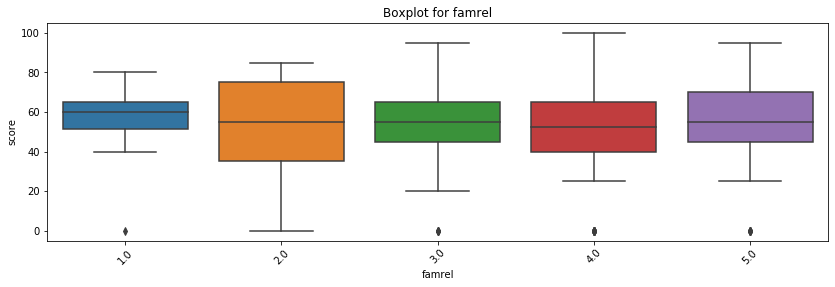

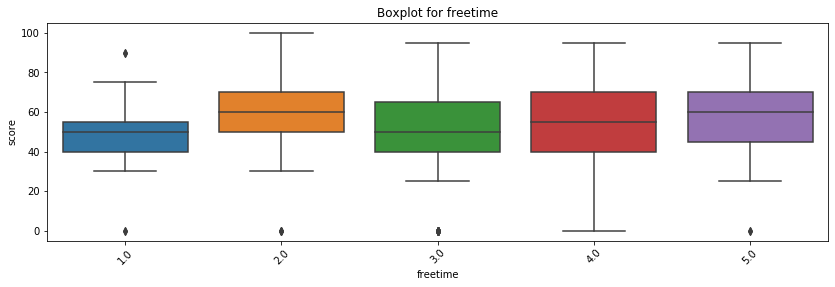

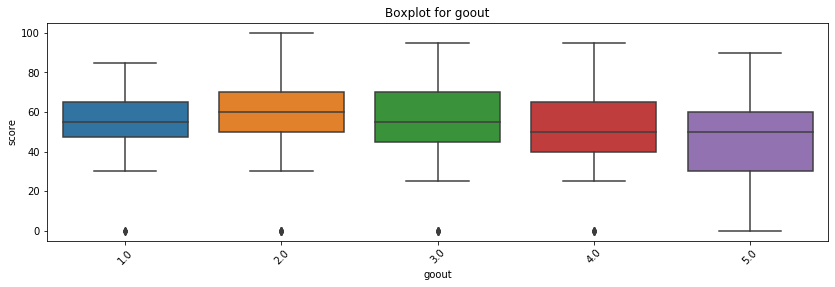

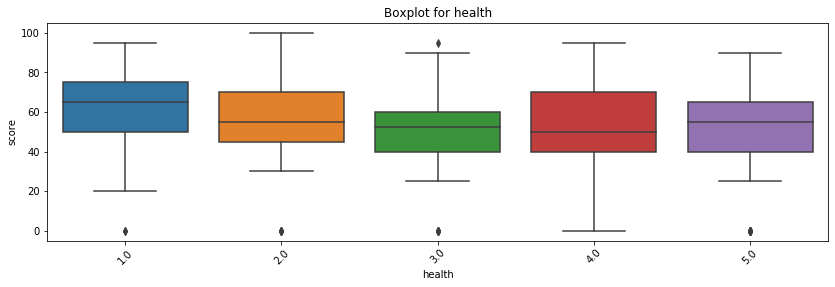

In [538]:
for col in ['school', 'address', 'famsize', 'p_status', 'm_edu', 'f_edu', 'm_job', 'f_job', 
            'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 
            'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)



Визуально кажется что плотности распределения ощутимо различаются для следующих распределений: m_edu, f_edu, m_job, f_job, studytime, failures, goout, health.

## Тест Стьюдента по категориальным признакам

In [539]:
def get_stat_dif(column):
    cols = study.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(study.loc[study.loc[:, column] == comb[0], 'score'].dropna(), 
                        study.loc[study.loc[:, column] == comb[1], 'score'].dropna()).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [540]:
for col in ['school', 'address', 'famsize', 'p_status', 'm_edu', 'f_edu', 'm_job', 'f_job', 
            'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 
            'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_edu
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout


Как мы видим, серьёзно отличаются семь параметров: address, m_edu, m_job, failures, higher, romantic и goout. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: address, m_edu, m_job, failures, higher, romantic и goout.

In [541]:
study_for_model = study.loc[:, ['age', 'absences', 'address', 'schoolsup', 
                              'm_edu', 'f_edu', 'm_job', 'f_job', 
                              'studytime', 'failures', 'goout', 'paid', 
                              'higher', 'romantic', 'score']]
study_for_model.head()

,age,absences,address,schoolsup,m_edu,f_edu,m_job,f_job,studytime,failures,goout,paid,higher,romantic,score
0,18,6.0,U,yes,4.0,4.0,at_home,teacher,2.0,0.0,4.0,no,yes,no,30.0
1,17,4.0,U,no,1.0,1.0,at_home,other,2.0,0.0,3.0,no,yes,no,30.0
2,15,10.0,U,yes,1.0,1.0,at_home,other,2.0,3.0,2.0,NaN,yes,NaN,50.0
3,15,2.0,U,no,4.0,2.0,health,NaN,3.0,0.0,2.0,yes,yes,yes,75.0
4,16,4.0,U,no,3.0,3.0,other,other,2.0,0.0,2.0,yes,yes,no,50.0


In [542]:
# теперь проверим нет ли очень сильно скоррелированных столбцов
study_for_model.corr()

,age,absences,m_edu,f_edu,studytime,failures,goout,score
age,1.000000,0.093592,-0.161704,-0.163670,-0.015556,0.228047,0.135107,-0.155726
absences,0.093592,1.000000,-0.011944,0.022572,-0.026544,0.057391,-0.048738,0.065283
m_edu,-0.161704,-0.011944,1.000000,0.625516,0.078589,-0.245463,0.064164,0.213349
f_edu,-0.163670,0.022572,0.625516,1.000000,0.012896,-0.272882,0.042663,0.130923
studytime,-0.015556,-0.026544,0.078589,0.012896,1.000000,-0.178992,-0.051280,0.115741
failures,0.228047,0.057391,-0.245463,-0.272882,-0.178992,1.000000,0.120914,-0.344338
goout,0.135107,-0.048738,0.064164,0.042663,-0.051280,0.120914,1.000000,-0.129685
score,-0.155726,0.065283,0.213349,0.130923,0.115741,-0.344338,-0.129685,1.000000


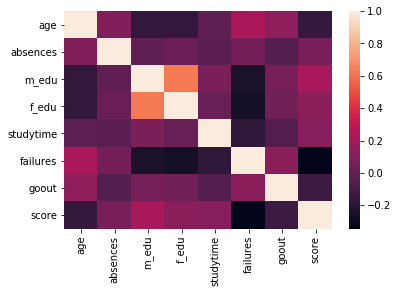

In [543]:
# построим тепловую карту для того,чтобы было легче оценить визуально
sns.heatmap(study_for_model.corr())

Cветлых зон кроме диагонали в нашем датасете нигде нет, темные зоны только в двух столбцах age и failures. Значения корреляции по этим столбцам далеки от -1 и 1 (-0.16 и -0.34), значит все в порядке - оставляем столбцы.

# 4. Выводы

Итак, в результате EDA для анализа влияния параметров студентов на итоговую оценку по математике были получены следующие выводы:

1. В данных достаточно много пустых значений, только 3 столбца из 29 заполнены полностью. В некоторых процент пропусков доходит до 11%.
2. Выбросы найдены: 
  - в столбце возраст 
  - в столбце score
3. Гипотезы:
  - отрицательная корреляция параметра age и score может указывать на то, что чем выше возраст тем ниже score;
  - отрицательная корреляция параметра failures и score может указывать на то, что чем больше неудач по другим предметам тем ниже score;
  - отрицательная корреляция параметра goout и score может указывать на то, что чем больше ученик проводит времени с друзьями тем ниже score;
  - положительная корреляция по парамметру m_edu может указывать на то, что чем выше лучше образование матери тем выше score
  - положительная корреляция по парамметру f_edu может указывать на то, что чем выше лучше образование отца тем выше score
4. Самые важных критерии, которые предлагается использовать для построения модели: age, absences, address, schoolsup, m_edu, f_edu, m_job, f_job, studytime, failures, goout, paid, higher, romantic.